In [1]:
%run project_functions.ipynb

Using TensorFlow backend.


In [2]:
file_name = 'FB.json'
csv_name = 'FB.csv'

In [3]:
#Features
company = stock_twits_text_parser(file_name)
company_metrics = stock_twits_metrics(company, 3, file_name)

#Labels
company_return = return_over_period_T(csv_name,3)


#Cleaned Data
agg_data = feature_selector(company_metrics, company_return, 'close_return', 25, 1000)
company_data = split_data(agg_data, 0.7, 'all', 'close_return', 'cont')

#Split
X_train = company_data['X_train']
Y_train = company_data['Y_train']
X_test = company_data['X_test']
Y_test = company_data['Y_test']

In [4]:
#Fit Model
clf_rf = RandomForestRegressor().fit(X_train, Y_train)

#Predict
pred_train_rf = clf_rf.predict(X_train)
pred_test_rf = clf_rf.predict(X_test)

In [5]:
as_train, as_test, as_predict_train, as_predict_test = action_signal_mapping(Y_train, Y_test, pred_train_rf, pred_test_rf, 0.005)

In [6]:
as_train_metrics, as_test_metrics, as_predict_train_metrics , as_predict_test_metrics = metrics_mapping_action_signals(as_train, as_test, as_predict_train, as_predict_test)


In [7]:
#Generate Confusion Matrices
confusion_train_rf = confusion_matrix(as_train_metrics, as_predict_train_metrics)
confusion_test_rf = confusion_matrix(as_test_metrics, as_predict_test_metrics)

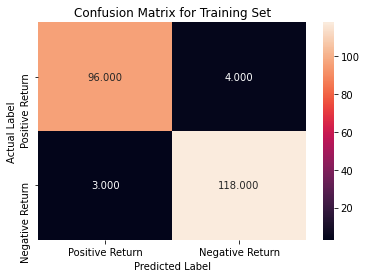

In [8]:
#Plot Confusion Matrix for Training Data
plot_confusion_matrix(confusion_train_rf, "Training")

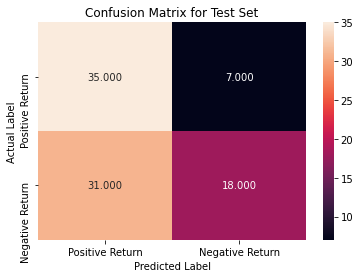

In [9]:
#Plot Confusion Matrix for Test Data
plot_confusion_matrix(confusion_test_rf, "Test")

In [10]:
#Calculate Metrics
tablerf = create_metrics_table(as_train_metrics, as_predict_train_metrics, as_test_metrics, as_predict_test_metrics)
tablerf

,Recall,Precision,F1 Score,Accuracy
Dataset,,,,
Training,0.975207,0.967213,0.971193,0.968326
Test,0.367347,0.720000,0.486486,0.582418
